In [1]:
import numpy as np 
from spectres import spectres
import matplotlib.pyplot as plt
from matplotlib import gridspec

Load the spectral data, the first column is wavelength, second flux density and third flux density uncertainty

In [2]:
spectrum = np.loadtxt("VST-ATLAS_J025.6821-33.4627.txt")

Specify the grid of wavelengths onto which you wish to sample, note that the new wavelength range is outside the ole wavelength range, zeros are padded when data is not available at those wavelengths.

In [3]:
regrid = np.arange(6400., 9500., 5.)

Call the spectres function to resample the input spectrum or spectra to the new wavelength grid

In [4]:
spec_resample, spec_errs_resample = spectres(regrid, spectrum[:,0], spectrum[:,1], spec_errs=spectrum[:,2])

/Users/marcolam/git/SpectRes/spectres/spectral_resampling.py:74: UserWarning: spectres: Part of the new wavelengths specified is outside the range of the input data, they are filled with zeros.
  warnings.warn("spectres: Part of the new wavelengths specified is "


Plotting code

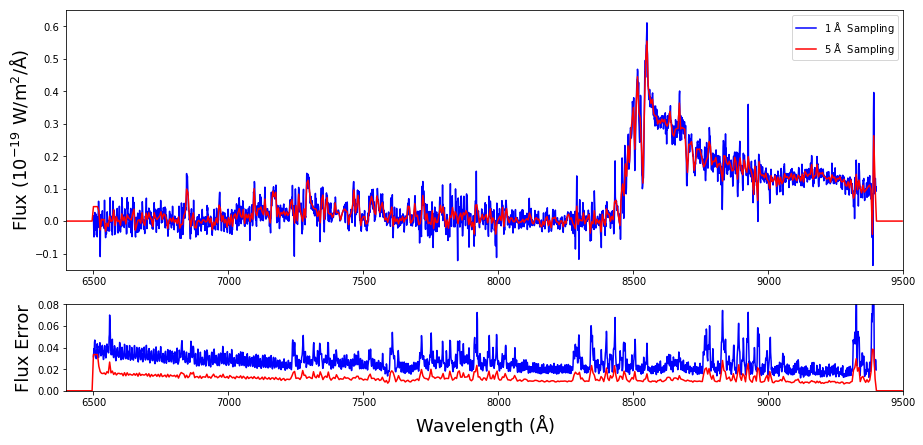

In [5]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.plot(spectrum[:,0], spectrum[:,1]*10**19, color="blue", lw=1.5, label="1 $\mathrm{\AA}\ $ Sampling")
ax1.plot(regrid, spec_resample*10**19, color="red", lw=1.5, label="5 $\mathrm{\AA}\ $ Sampling")


ax2.plot(spectrum[:,0], spectrum[:,2]*10**19, color="blue", lw=1.5)
ax2.plot(regrid, spec_errs_resample*10**19, color="red", lw=1.5)

ax1.set_ylabel("Flux ($10^{-19}\ \mathrm{W/m^2/\\AA)}$", size=18)
ax2.set_ylabel("Flux Error", size=18)

ax2.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=18)

ax1.set_xlim(6400, 9500)
ax1.set_ylim(-0.15, 0.65)
ax2.set_xlim(6400, 9500)
ax2.set_ylim(0, 0.08)
ax1.legend()